In [1]:
import numpy as np
import torch
import torchvision
import load_model
import patch
import plot_results

In [2]:
image_dim = 224
patch_relative_size = 5/100
path_dataset = 'C:\\Users\\alexi\\PROJET_3A\\Projet Adversarial Patch\\Project Adverserial Patch\\Collision Avoidance\\dataset'
path_model = 'C:\\Users\\alexi\\PROJET_3A\\Projet Adversarial Patch\\Project Adverserial Patch\\Collision Avoidance\\best_model_extended.pth'
path_img_folder = 'C:\\Users\\alexi\\PROJET_3A\\projet_CAS\\img\\'
path_patch_folder = 'C:\\Users\\alexi\\PROJET_3A\\projet_CAS\\patch\\'
path_training_results = 'C:\\Users\\alexi\\PROJET_3A\\projet_CAS\\training_results.txt'
path_test_results = 'C:\\Users\\alexi\\PROJET_3A\\projet_CAS\\test_results.txt'
patch_desc = patch.PatchDesc(image_dim, patch_relative_size)
model, train_loader, test_loader = load_model.load_model(path_dataset, path_model)

c:\Users\alexi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\alexi\AppData\Local\Programs\Python\Python39\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [3]:
patch_desc.train(model, train_loader, path_img_folder, path_training_results)

batch 0 success rate 0.000000
batch 1 success rate 0.500000
batch 2 success rate 0.333333
batch 3 success rate 0.250000
batch 4 success rate 0.400000
batch 5 success rate 0.500000
batch 6 success rate 0.428571
batch 7 success rate 0.500000


KeyboardInterrupt: 

In [4]:
patch_desc.test(model, test_loader, path_test_results)
#tracer courbes validation

batch 0 success rate 1.000000
batch 1 success rate 0.500000
batch 2 success rate 0.666667
batch 3 success rate 0.500000
batch 4 success rate 0.600000
batch 5 success rate 0.666667
batch 6 success rate 0.714286
batch 7 success rate 0.750000
batch 8 success rate 0.777778
batch 9 success rate 0.700000
batch 10 success rate 0.727273
batch 11 success rate 0.666667
batch 12 success rate 0.692308
batch 13 success rate 0.714286
batch 14 success rate 0.733333
batch 15 success rate 0.750000
batch 16 success rate 0.764706
batch 17 success rate 0.777778
batch 18 success rate 0.736842
batch 19 success rate 0.700000
batch 20 success rate 0.714286
batch 21 success rate 0.727273
batch 22 success rate 0.695652
batch 23 success rate 0.708333
batch 24 success rate 0.720000
batch 25 success rate 0.730769
batch 26 success rate 0.740741
batch 27 success rate 0.750000
batch 28 success rate 0.758621
batch 29 success rate 0.733333
batch 30 success rate 0.741935
batch 31 success rate 0.750000
batch 32 success r

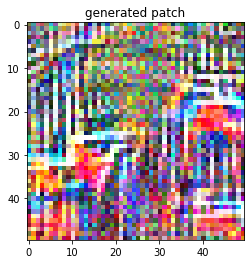

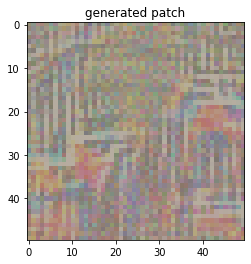

In [5]:
import matplotlib.pyplot as plt

def tensor_to_numpy_array(tensor):
    tensor = torch.squeeze(tensor)
    array = tensor.cpu().numpy()
    return np.transpose(array, (1, 2, 0))

#https://discuss.pytorch.org/t/simple-way-to-inverse-transform-normalization/4821/3
unnormalize = torchvision.transforms.Compose([
    torchvision.transforms.Normalize(mean = [0., 0., 0.], std = [1/0.229, 1/0.224, 1/0.225]),
    torchvision.transforms.Normalize(mean = [-0.485, -0.456, -0.406], std = [1., 1., 1.]),
    ])
#verifier

torchvision.utils.save_image(patch_desc.patch.data, path_patch_folder
                                            + '%d.png' 
                                            % (patch_desc.id), normalize=True)

plt.imshow(tensor_to_numpy_array(patch_desc.patch), interpolation='nearest')
plt.title('generated patch')

plt.show()

patch_desc_unnormalized = unnormalize(patch_desc.patch)

plt.imshow(tensor_to_numpy_array(patch_desc_unnormalized), interpolation='nearest')
plt.title('generated patch')
plt.show()


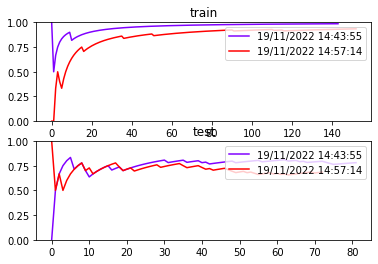

In [6]:
r_train, training_dates = plot_results.parse_results(path_training_results)
r_test, _ = plot_results.parse_results(path_test_results)
plot_results.plot_results(r_train, training_dates, r_test)